# Configuring Your Lambda Functions
When building and testing a function, you must specify three primary configuration settings: memory, timeout, and concurrency. These settings are important in defining how each function performs. Deciding how to configure memory, timeout, and concurrency comes down to testing your function in real-world scenarios and against peak volume. As you monitor your functions, you must adjust the settings to optimize costs and ensure the desired customer experience with your application.

First, you'll review the importance of configuring your memory and timeout values. Then you'll review the billing considerations for memory and timeout values before you examine concurrency and how to optimize for it.

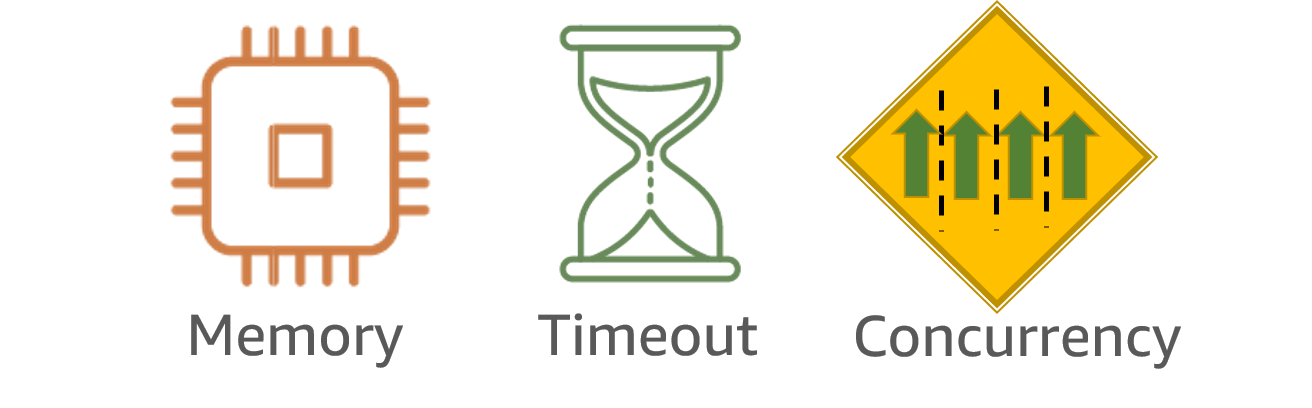

### Memory

You can allocate up to 10 GB of memory to a Lambda function. Lambda allocates CPU and other resources linearly in proportion to the amount of memory configured. Any increase in memory size triggers an equivalent increase in CPU available to your function. To find the right memory configuration for your functions, use the AWS Lambda Power Tuning tool(opens in a new tab). Because Lambda charges are proportional to the memory configured and function duration (GB-seconds), the additional costs for using more memory may be offset by lower duration.

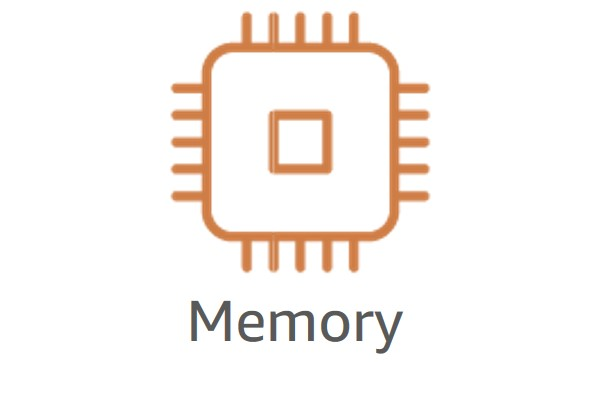

### Timeout

The AWS Lambda timeout value dictates how long a function can run before Lambda terminates the Lambda function. At the time of this publication, the maximum timeout for a Lambda function is 900 seconds. This limit means that a single invocation of a Lambda function cannot run longer than 900 seconds (which is 15 minutes). 

Set the timeout for a Lambda function to the maximum only after you test your function. There are many cases when an application should fail fast and not wait for the full timeout value. 

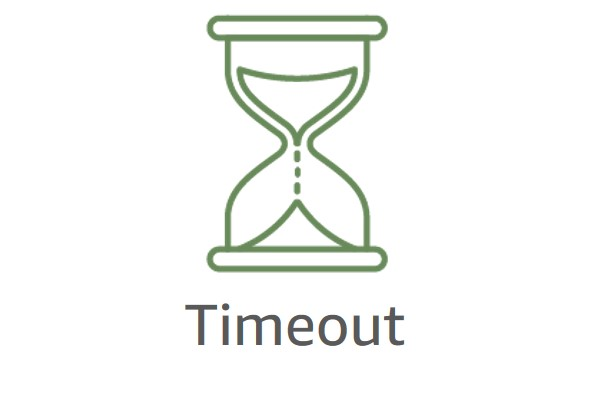

It is important to analyze how long your function runs. When you analyze the duration, you can better determine any problems that might increase the invocation of the function beyond your expected length. Load testing your Lambda function is the best way to determine the optimum timeout value.

Your Lambda function is billed based on runtime in 1-ms increments. Avoiding lengthy timeouts for functions can prevent you from being billed while a function is simply waiting to time out.

## Lambda billing costs

With AWS Lambda, you pay only for what you use. You are charged based on the number of requests for your functions and the duration, the time it takes for your code to run. Lambda counts a request each time it starts running in response to an event notification or an invoke call, including test invokes from the console.

Duration is calculated from the time your code begins running until it returns or otherwise terminates, rounded up to the nearest 1 ms. Price depends on the amount of memory you **allocate** to your function, not the amount of memory your function uses. If you allocate 10 GB to a function and the function only uses 2 GB, you are charged for the 10 GB. This is another reason to test your functions using different memory allocations to determine which is the most beneficial for the function and your budget. 

In the AWS Lambda resource model, you can choose the amount of memory you want for your function and are allocated proportional CPU power and other resources. An increase in memory triggers an equivalent increase in CPU available to your function. The AWS Lambda Free Tier includes 1 million free requests per month and 400,000 GB-seconds of compute time per month.

## The balance between power and duration

Depending on the function, you might find that the higher memory level might actually cost less because the function can complete much more quickly than at a lower memory configuration.

You can use an open-source tool called Lambda Power Tuning to find the best configuration for a function. The tool helps you to visualize and fine-tune the memory and power configurations of Lambda functions. The tool runs in your own AWS account—powered by AWS Step Functions—and supports three optimization strategies: cost, speed, and balanced. It's language-agnostic so that you can optimize any Lambda functions in any of your languages. 

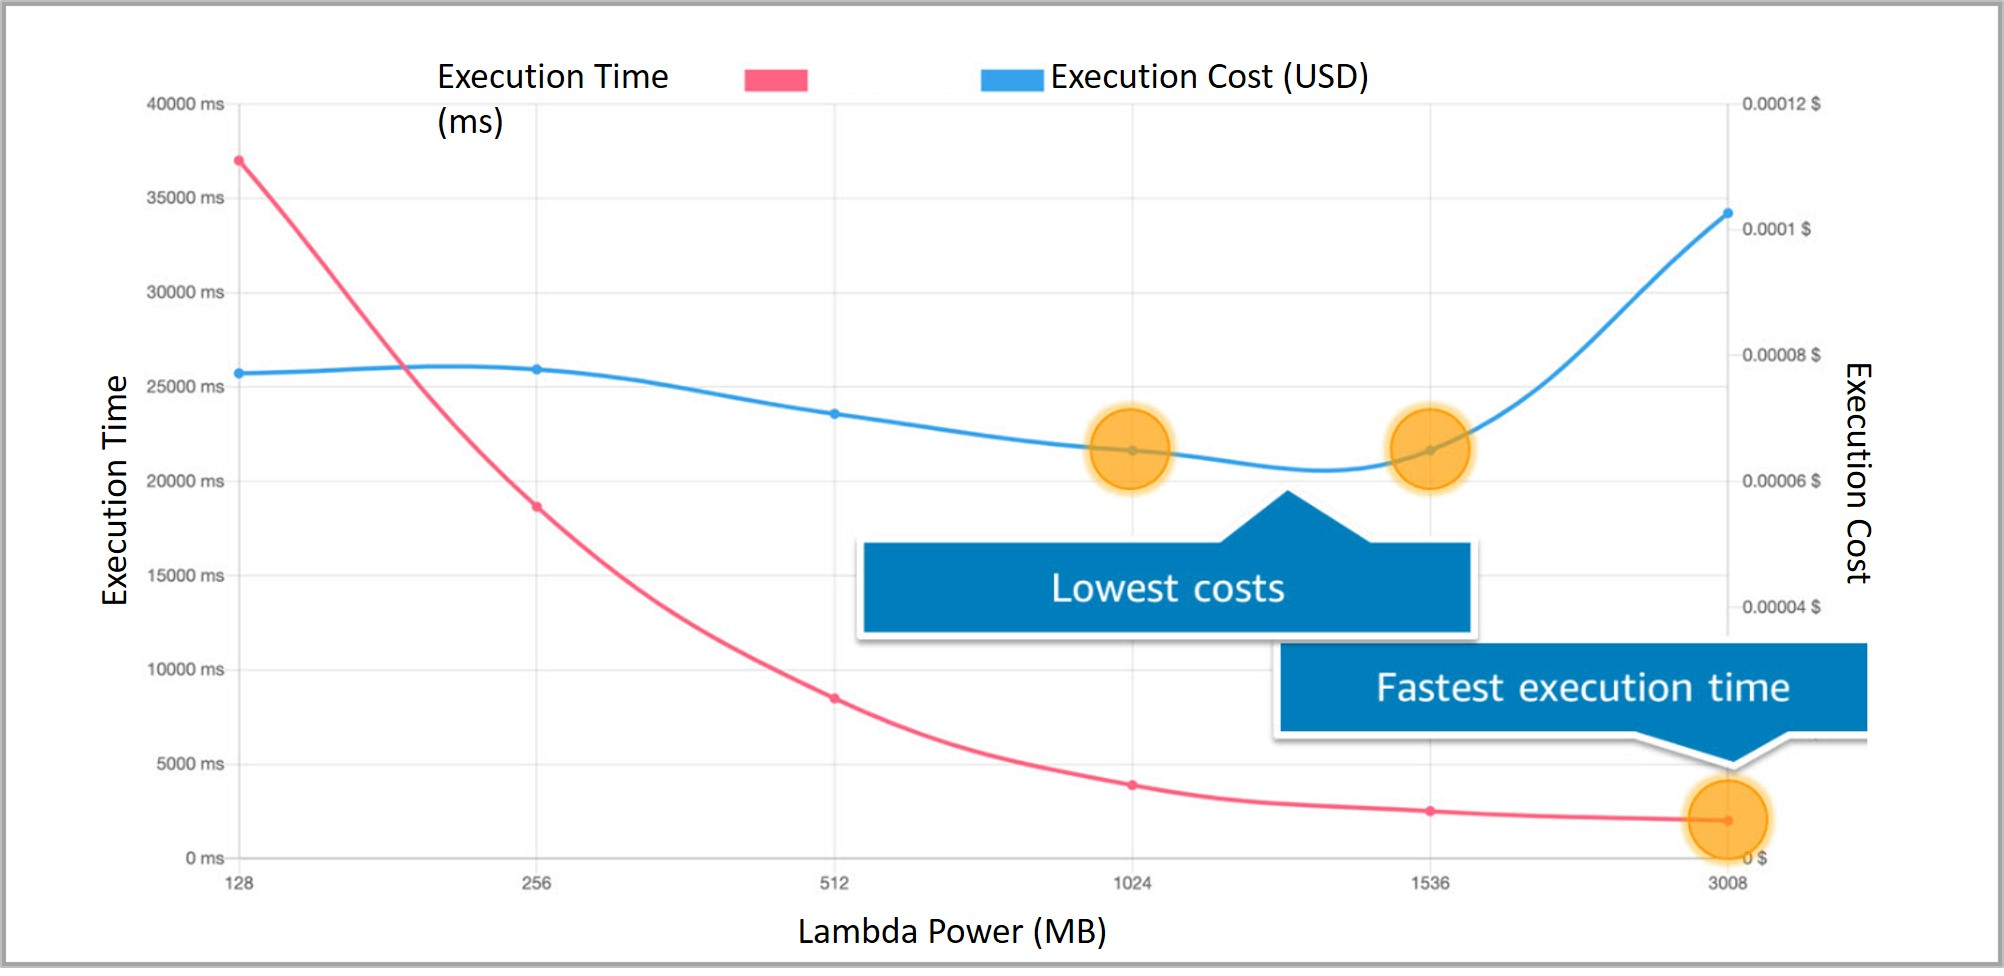



## Concurrency and scaling

Concurrency is the third major configuration that affects your function's performance and its ability to scale on demand. Concurrency is the number of invocations your function runs at any given moment. When your function is invoked, Lambda launches an instance of the function to process the event. When the function code finishes running, it can handle another request. If the function is invoked again while the first request is still being processed, another instance is allocated. Having more than one invocation running at the same time is the function's concurrency.

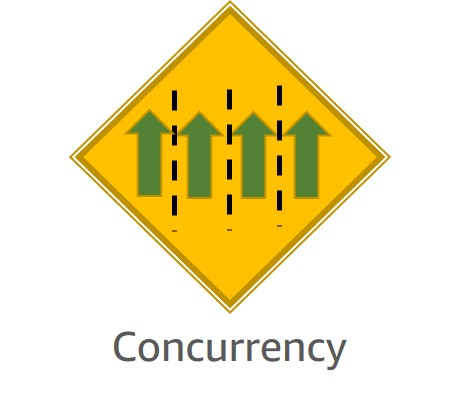

## Concurrent invocations

As an analogy, you can think of concurrency as the total capacity of a restaurant for serving a certain number of diners at one time. If you have seats in the restaurant for 100 diners, only 100 people can sit at the same time. Anyone who comes while the restaurant is full must wait for a current diner to leave before a seat is available. If you use a reservation system, and a dinner party has called to reserve 20 seats, only 80 of those 100 seats are available for people without a reservation. Lambda functions also have a concurrency limit and a reservation system that can be used to set aside runtime for specific instances.

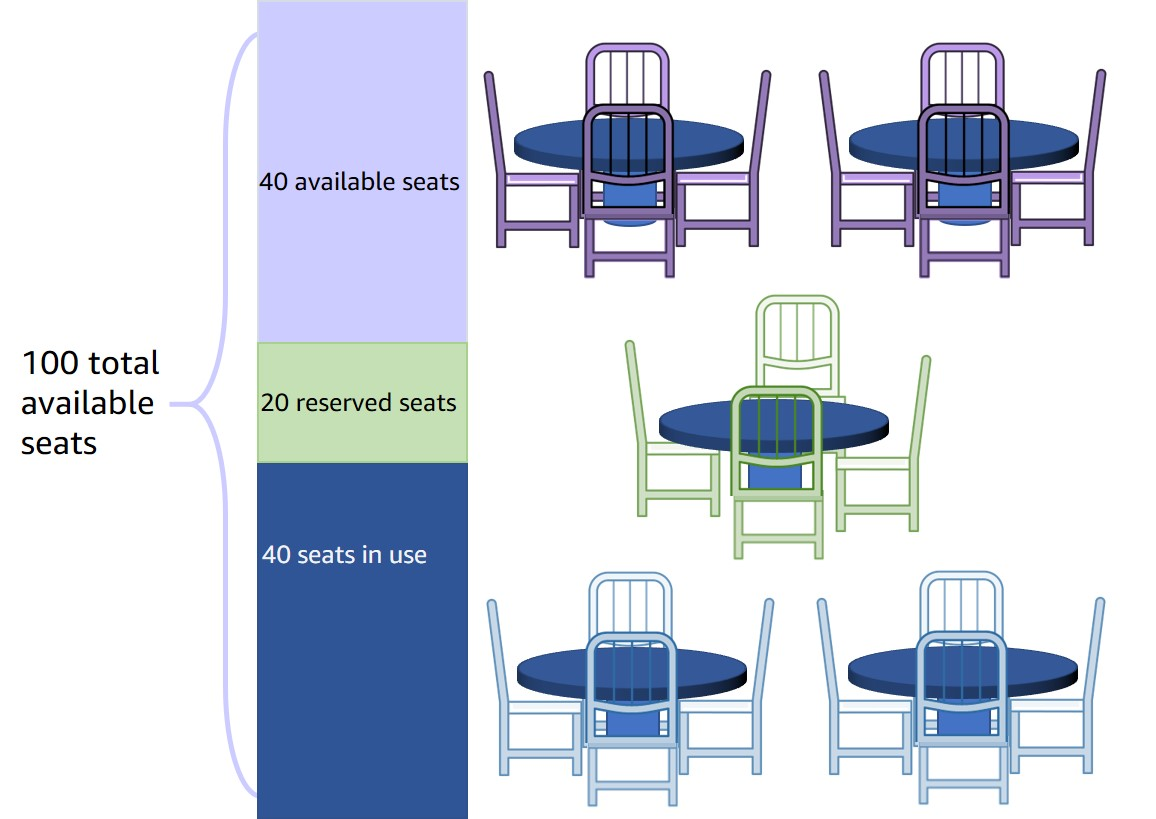


## Concurrency types

### Unreserved concurrency

The amount of concurrency that is not allocated to any specific set of functions. The minimum is 100 unreserved concurrency. This allows functions that do not have any provisioned concurrency to still be able to run. If you provision all your concurrency to one or two functions, no concurrency is left for any other function. Having at least 100 available allows all your functions to run when they are invoked.

### Reserved concurrency

Guarantees the maximum number of concurrent instances for the function. When a function has reserved concurrency, no other function can use that concurrency. No charge is incurred for configuring reserved concurrency for a function.

### Provisioned concurrency

Initializes a requested number of runtime environments so that they are prepared to respond immediately to your function's invocations. This option is used when you need high performance and low latency. 



You pay for the amount of provisioned concurrency that you configure and for the period of time that you have it configured. 



For example, you might want to increase provisioned concurrency when you are expecting a significant increase in traffic. To avoid paying for unnecessary warm environments, you scale back down when the event is over.

## Concurrency examples and limits

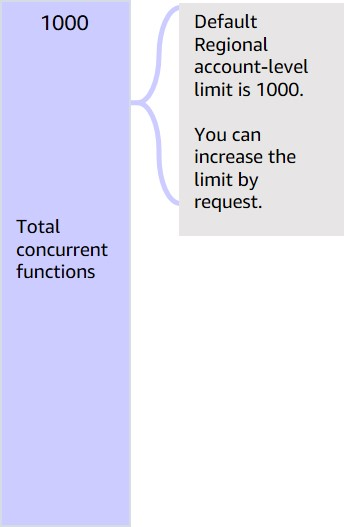

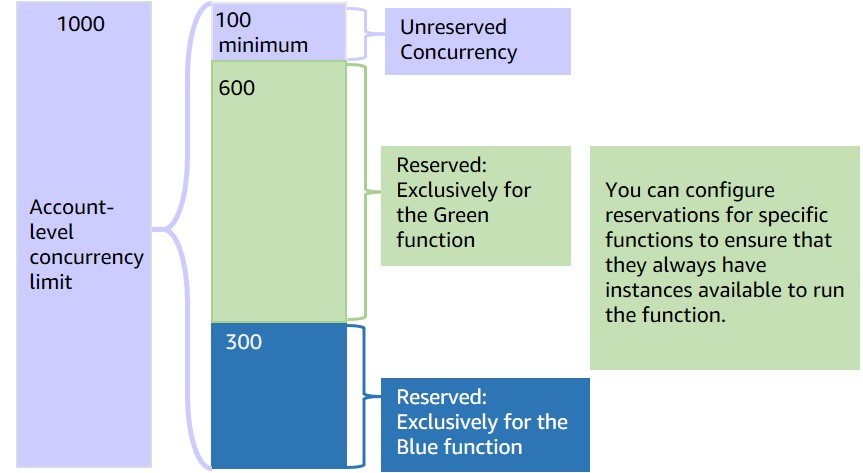

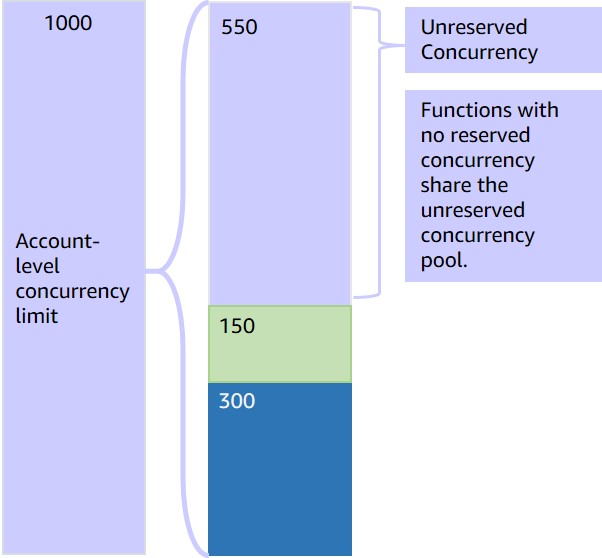

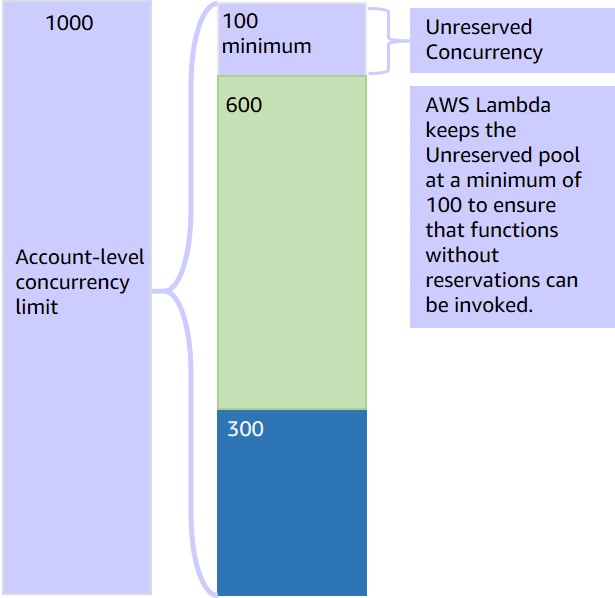

## Reasons for setting concurrency limits

### Limit Concurrency

Limit a function’s concurrency to achieve the following:

- Limit costs
- Regulate how long it takes you to process a batch of events
- Match it with a downstream resource that cannot scale as quickly as Lambda


### Reserve Concurrency

Reserve function concurrency to achieve the following: 

- Ensure that you can handle peak expected volume for a critical function 
- Address invocation errors

## How concurrency bursts are managed

A burst is when there is a sudden increase in the number of instances needed to fulfill the requested number of running functions. An example is an increase in orders on a website during a limited time sale. The burst concurrency quota is not per function. It applies to all of your functions in the Region. 

The burst quotas differ by region:

- 3000 – US West (Oregon), US East (N. Virginia), Europe (Ireland)

- 1000 – Asia Pacific (Tokyo), Europe (Frankfurt), US East (Ohio)

- 500 – Other Regions

After the initial burst, your functions' concurrency can scale by an additional 500 instances each minute. This continues until there are enough instances to serve all requests, or until a concurrency limit is reached.

The following set of images explains how bursting works with Lambda functions.

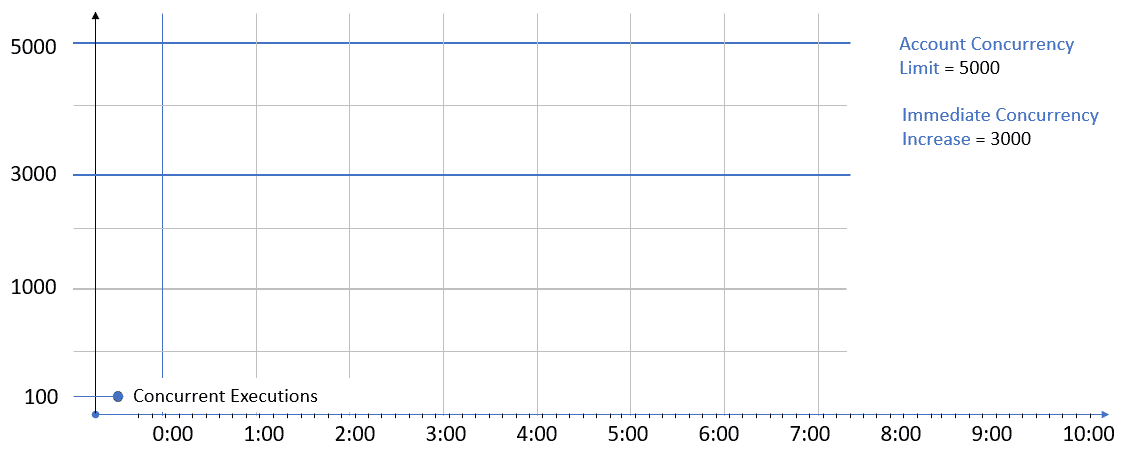

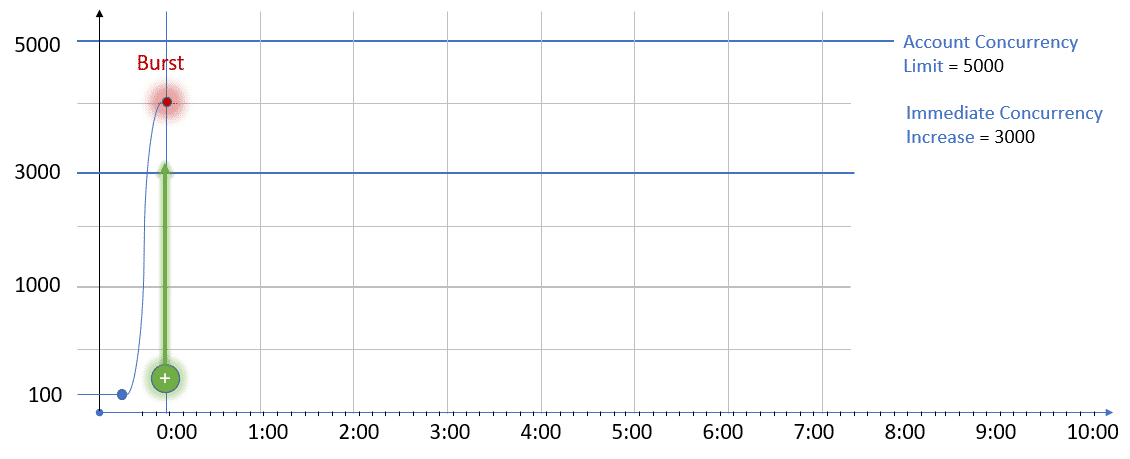

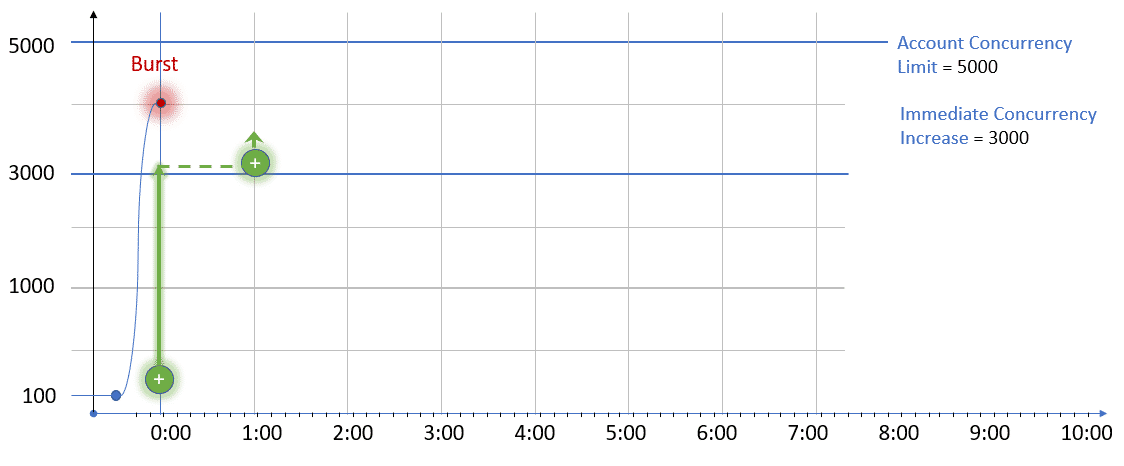

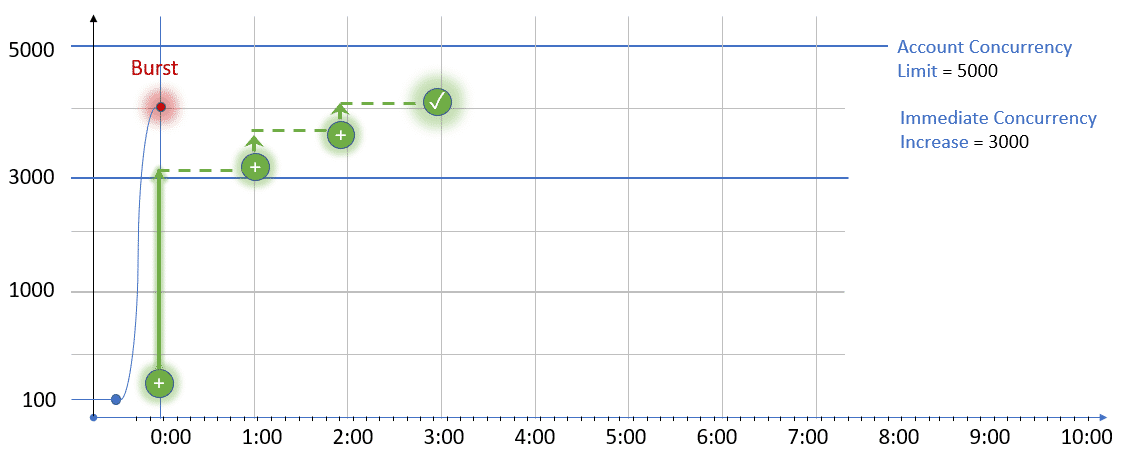

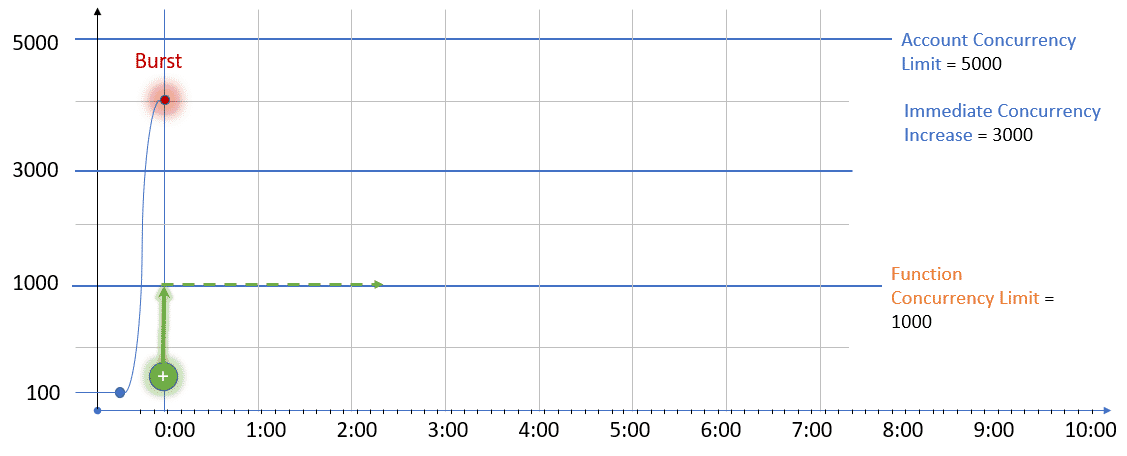

## CloudWatch metrics for concurrency

When your function finishes processing an event, Lambda sends metrics about the invocation to Amazon CloudWatch. You can build graphs and dashboards with these metrics in the CloudWatch console. You can also set alarms to respond to changes in use, performance, or error rates.

CloudWatch includes two built-in metrics that help determine concurrency: ConcurrentExecutions and UnreservedConcurrentExecutions.

### ConcurrentExecutions

Shows the sum of concurrent invocations for a given function at a given point in time. Provides historical data on how functions are performing. 



You can view all functions in the account or only the functions that have a custom concurrency limit specified.

### UnreservedConcurrentExecutions

Shows the sum of the concurrency for the functions that do not have a custom concurrency limit specified.

## Testing concurrency

The most important factor for your concurrency, memory, and timeout settings is to verify application testing against real-world conditions. To do this, follow these suggestions:

- Run performance tests that simulate peak levels of invocations.
    - View the metrics for the amount of throttling that occurs during performance peaks.
- Determine whether the existing backend can handle the speed of requests sent to it.
    - Don't test in isolation. If you’re connecting to Amazon Relational Database Service (Amazon RDS), ensure that you test that the concurrency levels for your function can be processed by the database.
- Does your error handling work as expected? 
    - Tests should include pushing the application beyond the concurrency settings to verify correct error handling.